# Streaks in ZTF images

*Yash Melkani*

In [1]:
from scripts.streaks import *
%matplotlib inline 


#### Download ZTF img from IRSA

download_ZTF() allows you to download ZTF images from the IRSA database.

To download ZTF image data, the ra, dec, start and end times must be set in the function call. Optional parameters include metatable_path which determines where to save the metatable (default is None so the metatable is not saved),  kind (default is "sci"), and kind_type (default is "sciimg.fits") which specify what data you want to access.

In [2]:
ra = 149.8603
dec = 30.7464
tstart = time.Time("2019-12-08").jd
tend = time.Time("2019-12-15").jd

download_ZTF(ra, dec, tstart, tend)

delayed


C:\Users\yashm\anaconda3\lib\site-packages\ztfquery\io.py:647: UserWarning: No parallel downloading
  warnings.warn("No parallel downloading")
C:\Users\yashm\anaconda3\lib\site-packages\ztfquery\io.py:696: UserWarning: ./Data/sci/2019/1210/448160/ztf_20191210448160_000667_zr_c02_o_q2_sciimg.fits already exists: skipped
  warnings.warn("%s already exists: skipped"%fileout)
C:\Users\yashm\anaconda3\lib\site-packages\ztfquery\io.py:696: UserWarning: ./Data/sci/2019/1213/433472/ztf_20191213433472_000667_zr_c02_o_q2_sciimg.fits already exists: skipped
  warnings.warn("%s already exists: skipped"%fileout)
C:\Users\yashm\anaconda3\lib\site-packages\ztfquery\io.py:696: UserWarning: ./Data/sci/2019/1213/432569/ztf_20191213432569_001664_zr_c09_o_q1_sciimg.fits already exists: skipped
  warnings.warn("%s already exists: skipped"%fileout)
C:\Users\yashm\anaconda3\lib\site-packages\ztfquery\io.py:696: UserWarning: ./Data/sci/2019/1213/432118/ztf_20191213432118_001664_zr_c09_o_q1_sciimg.fits already

,in_row_id,in_ra,in_dec,ra,dec,infobits,field,ccdid,qid,rcid,...,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,ipac_pub_date,ipac_gid
0,1,149.8603,30.7464,149.645745,30.896868,0,667,2,2,5,...,150.153812,31.327182,149.142334,31.330745,149.142327,30.464477,150.144928,30.460767,2020-06-24 00:00:00+00,1
1,1,149.8603,30.7464,149.653393,30.888854,0,667,2,2,5,...,150.161456,31.319142,149.150059,31.322751,149.150009,30.456508,150.152453,30.452727,2020-06-24 00:00:00+00,1
2,1,149.8603,30.7464,150.064970,31.069501,0,1664,9,1,32,...,150.587105,31.487609,149.574362,31.514954,149.547090,30.649056,150.551044,30.622131,2021-06-30 00:00:00+00,3
3,1,149.8603,30.7464,150.064863,31.069451,0,1664,9,1,32,...,150.586995,31.487573,149.574260,31.514891,149.547012,30.649040,150.550928,30.622085,2021-06-30 00:00:00+00,2
4,1,149.8603,30.7464,149.654314,30.889933,0,667,2,2,5,...,150.162346,31.320240,149.150942,31.323802,149.150970,30.457551,150.153380,30.453854,2020-06-24 00:00:00+00,1


#### Get paths for ZTF images

get_ZTF_path() returns the path of downloaded ZTF images given the ra, dec, and start and end times. Optional parameters include kind (default is "sci"), and kind_type (default is "sciimg.fits") which specify what data you want to access.

Below is an example use of get_ZTF_path() for the data downloaded in the previous code cell.

In [3]:
ra = 149.8603
dec = 30.7464
tstart = time.Time("2019-12-08").jd
tend = time.Time("2019-12-15").jd

get_ZTF_path(ra, dec, tstart, tend)

array(['./Data/sci/2019/1210/448160/ztf_20191210448160_000667_zr_c02_o_q2_sciimg.fits',
       './Data/sci/2019/1213/433472/ztf_20191213433472_000667_zr_c02_o_q2_sciimg.fits',
       './Data/sci/2019/1213/432569/ztf_20191213432569_001664_zr_c09_o_q1_sciimg.fits',
       './Data/sci/2019/1213/432118/ztf_20191213432118_001664_zr_c09_o_q1_sciimg.fits',
       './Data/sci/2019/1213/455891/ztf_20191213455891_000667_zr_c02_o_q2_sciimg.fits'],
      dtype='<U77')

#### View ZTF Img

To view ZTF images, use the display_fit() function. The function takes in a ZTF image file path as an input and plots the resulting image.

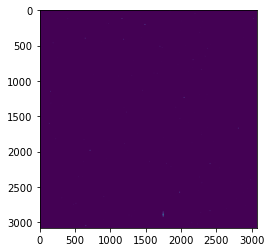

In [4]:
display_fit("./Data/sci/2019/1210/448160/ztf_20191210448160_000667_zr_c02_o_q2_sciimg.fits")

You can also get an array of the fit from its path. Below is an example of simple thresholding with a ZTF image.

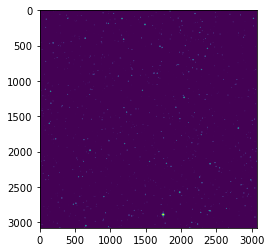

In [5]:
import numpy as np
img_arr = get_img("./Data/sci/2019/1210/448160/ztf_20191210448160_000667_zr_c02_o_q2_sciimg.fits")
mask = np.zeros(shape = img_arr.shape)
mask[img_arr>600] = 1
plt.imshow(mask)

#### Detect Streaks

find_streaks() will look for horizontal and vertical streaks in the ZTF image. The function takes in the path to the fits file as well as a threshold for detection (between 0 and 1). The threshold for detection is automatically set to 0.05 but this can be changed in the function call. 
The method returns two arrays, the first being the row indices of detected horizontal streaks and the second being the column indices of detected vertical streaks.

Below is an example use. For this file, the find_streaks() method did not detect any streaks in the image.

In [6]:
h_streaks, v_streaks = find_streak("./Data/sci/2019/1210/448160/ztf_20191210448160_000667_zr_c02_o_q2_sciimg.fits")
print(f"Horizontal streaks: {h_streaks} Verticle Streaks: {v_streaks}")

Horizontal streaks: (array([], dtype=int64),) Verticle Streaks: (array([], dtype=int64),)


Below is an example of find_streaks identifying a verticle streak in the image
(the "/streaks/" folder contains example images from ZTF which have streaks).

In [7]:
h_streaks, v_streaks = find_streak("./streaks/sci/2018/1104/550428/ztf_20181104550428_001664_zr_c09_o_q1_sciimg_ra149.8603_dec30.7464_asec500.fits")
print(f"Horizontal streaks: {h_streaks} Verticle Streaks: {v_streaks}")

Horizontal streaks: (array([], dtype=int64),) Verticle Streaks: (array([370, 371], dtype=int64),)
